# Projekt analizy danych ze zbioru MTCars

Zbiór danych "mtcars" zawiera 32 obserwacje (rzędy) oraz 11 zmiennych (kolumn). Zmienne te obejmują różne atrybuty samochodów, z których postaram się wyciągnąć zależności.

Zmienne:
- mpg: Mili na galon, czyli efektywność paliwa.
- cyl: Liczba cylindrów.
- disp: Pojemność skokowa (w calach sześciennych).
- hp: Moc silnika (konie mechaniczne).
- drat: Przełożenie wału napędowego
- wt: Waga (w tysiącach funtów).
- qsec: Czas przejazdu 1/4 mili (w sekundach).
- vs: Rodzaj silnika (0 - V-shaped, 1 - straight).
- am: Rodzaj skrzyni biegów (0 - automatyczna, 1 - manualna).
- gear: Liczba biegów.
- carb: Liczba gaźników.

### Przygotowanie środowiska i danych

Import potrzebnych bibliotek:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro

Pobranie danych oraz załadowanie ich do zmiennej:

In [3]:
url = "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"
mtcars = pd.read_csv(url)

Wyświetlenie pierwszych kilku wierszy danych, aby upewnić się, że zostały poprawnie wczytane:

In [4]:
print(mtcars.head())

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


Informacje o danych:

In [4]:
print(mtcars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


Sprawdzenie brakujących wartości:

In [5]:
print(mtcars.isnull().sum())

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64


Przekonwertowanie pojemności silnika z cali sześciennych na litry: 

In [11]:
mtcars['disp'] = mtcars['disp'] * 0.0163871
print(mtcars['disp'])

0     0.000704
1     0.000704
2     0.000475
3     0.001135
4     0.001584
5     0.000990
6     0.001584
7     0.000646
8     0.000620
9     0.000738
10    0.000738
11    0.001214
12    0.001214
13    0.001214
14    0.002077
15    0.002024
16    0.001936
17    0.000346
18    0.000333
19    0.000313
20    0.000529
21    0.001399
22    0.001338
23    0.001540
24    0.001760
25    0.000348
26    0.000529
27    0.000418
28    0.001545
29    0.000638
30    0.001325
31    0.000532
Name: disp, dtype: float64


### Analiza wizualna danych (wykresy)

#### Wykres rozproszenia dla mpg i hp:

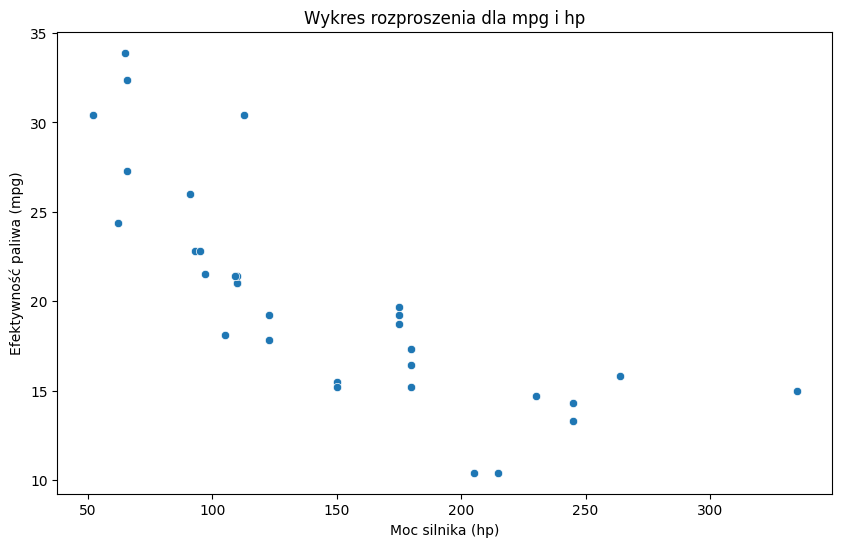

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=mtcars)
plt.title('Wykres rozproszenia dla mpg i hp')
plt.xlabel('Moc silnika (hp)')
plt.ylabel('Efektywność paliwa (mpg)')
plt.show()

Na wykresie możemy zauważyć, że istnieje odwrotna zależność między mocą silnika (hp) a efektywnością paliwa (mpg) - samochody o większej mocy mają zazwyczaj mniejszą efektywność paliwa.

#### Histogram efektywności paliwa (mpg):

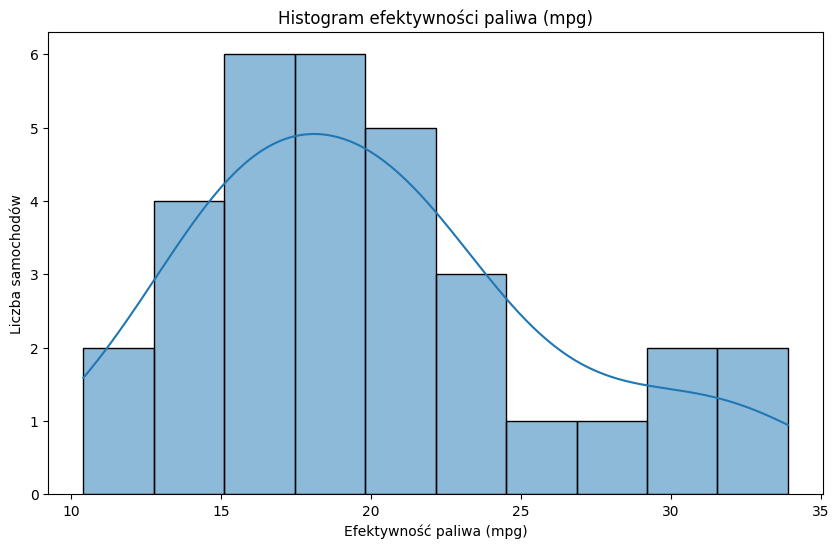

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(mtcars['mpg'], kde=True, bins=10)
plt.title('Histogram efektywności paliwa (mpg)')
plt.xlabel('Efektywność paliwa (mpg)')
plt.ylabel('Liczba samochodów')
plt.show()

Powyższy histogram efektywności paliwa (mpg) sugeruje, że rozkład mpg jest zbliżony do rozkładu normalnego. Większość samochodów posiada efektywność paliwa na poziomi 15-20 mpg.

#### Wykres pudełkowy dla mpg w zależności od liczby cylindrów (cyl):

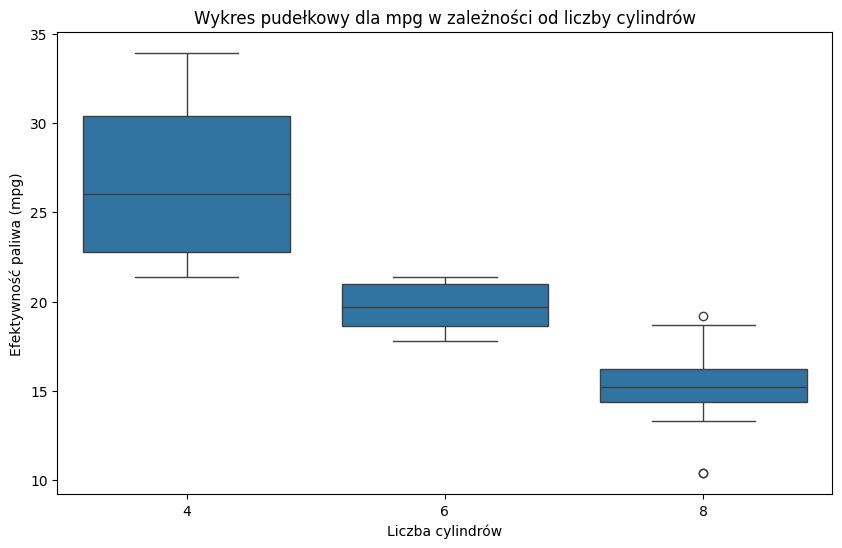

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cyl', y='mpg', data=mtcars)
plt.title('Wykres pudełkowy dla mpg w zależności od liczby cylindrów')
plt.xlabel('Liczba cylindrów')
plt.ylabel('Efektywność paliwa (mpg)')
plt.show()

Przedstawiony wykres pokazuje, że samochody z większą liczbą cylindrów mają zazwyczaj niższą efektywność paliwa.

### Analiza statystyczna danych

#### Podstawowe statystyki:

In [9]:
print(mtcars.describe())

             mpg        cyl       disp          hp       drat         wt  \
count  32.000000  32.000000  32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500   3.780862  146.687500   3.596563   3.217250   
std     6.026948   1.785922   2.030996   68.562868   0.534679   0.978457   
min    10.400000   4.000000   1.165123   52.000000   2.760000   1.513000   
25%    15.425000   4.000000   1.979971   96.500000   3.080000   2.581250   
50%    19.200000   6.000000   3.216788  123.000000   3.695000   3.325000   
75%    22.800000   8.000000   5.342195  180.000000   3.920000   3.610000   
max    33.900000   8.000000   7.734711  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.

#### Testy statystyczne:

##### Test Shapiro-Wilka na normalność rozkładu mpg:

In [10]:
stat, p = shapiro(mtcars['mpg'])
print(f'Test Shapiro-Wilka: stat={stat}, p={p}')

Test Shapiro-Wilka: stat=0.9475647265971182, p=0.12288135948636081


Test Shapiro-Wilka wykazał wartość stat (W) na poziomie bliskim 1, co oznacza że wartości mpg mają w miarę rozkład normalny.
Wartość p na poziomie 0.122 oznacza, że nie ma powodu do odrzucenia hipotezy zerowej (że dane pochodzą z populacji o rozkładzie normalnym).

##### Test t dla mpg w zależności od rodzaju silnika (vs):

In [11]:
vs_0 = mtcars[mtcars['vs'] == 0]['mpg']
vs_1 = mtcars[mtcars['vs'] == 1]['mpg']

t_stat, p_value = ttest_ind(vs_0, vs_1)
print(f'Test t: t_stat={t_stat}, p_value={p_value}')

Test t: t_stat=-4.864384956122782, p_value=3.415937254419951e-05


Wartość p (p_value) jest znacznie mniejsza niż standardowy poziom istotności 0.05, co oznacza, że istnieją statystycznie różnice między badanymi grupami. Natomiast wartość t_stat oznacza że średnia próby jest znacznie niższa niż średnia porównawcza. Obie te wartości oznaczają bardzo niskie prawdopodobieństwo, że różnice w wartościach mpg przy różnych rodziajach silnika są wynikiem przypadku. 